In [12]:
import os
import pandas as pd

# Define the folder path
folder_path = "/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Figure3"

# Define base file names and the variations
base_file_names = [("Poi110_2nd_A.dat", "Poi110_2nd_B.dat"), ("Poi180_4th_A.dat", "Poi180_4th_B.dat")]
output_file_names = ["combined_DNS_Re110.csv", "combined_DNS_Re180.csv"]

# Loop through each pair of files and process them
for (file_name_A, file_name_B), output_file_name in zip(base_file_names, output_file_names):
    # Construct the full file paths
    file_path_A = os.path.join(folder_path, file_name_A)
    file_path_B = os.path.join(folder_path, file_name_B)

    # Read the data from the files
    data_A = pd.read_csv(file_path_A, delim_whitespace=True)
    data_B = pd.read_csv(file_path_B, delim_whitespace=True)

    # Select the relevant columns
    columns_to_select1 = ['y+', 'u_mean', 'uu+', 'ww+']
    columns_to_select2 = ['vv+']
    data_A_selected = data_A[columns_to_select1]
    data_B_selected = data_B[columns_to_select2]

    # Combine the data into one dataframe
    combined_data = pd.concat([data_A_selected, data_B_selected], axis=1)

    # Calculate the value of k
    combined_data['k'] = 0.5 * (combined_data['uu+'] + combined_data['vv+'] + combined_data['ww+'])

    # Adjust the sequence of the columns
    final_columns_order = ['y+', 'u_mean', 'uu+', 'vv+', 'ww+', 'k']
    combined_data = combined_data[final_columns_order]

    # Define the output file path
    output_file_path = os.path.join(folder_path, output_file_name)

    # Save the combined data to a new CSV file
    combined_data.to_csv(output_file_path, index=False)

    print(f"Combined data saved to '{output_file_path}'")



Combined data saved to '/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Figure3/combined_DNS_Re110.csv'
Combined data saved to '/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Figure3/combined_DNS_Re180.csv'


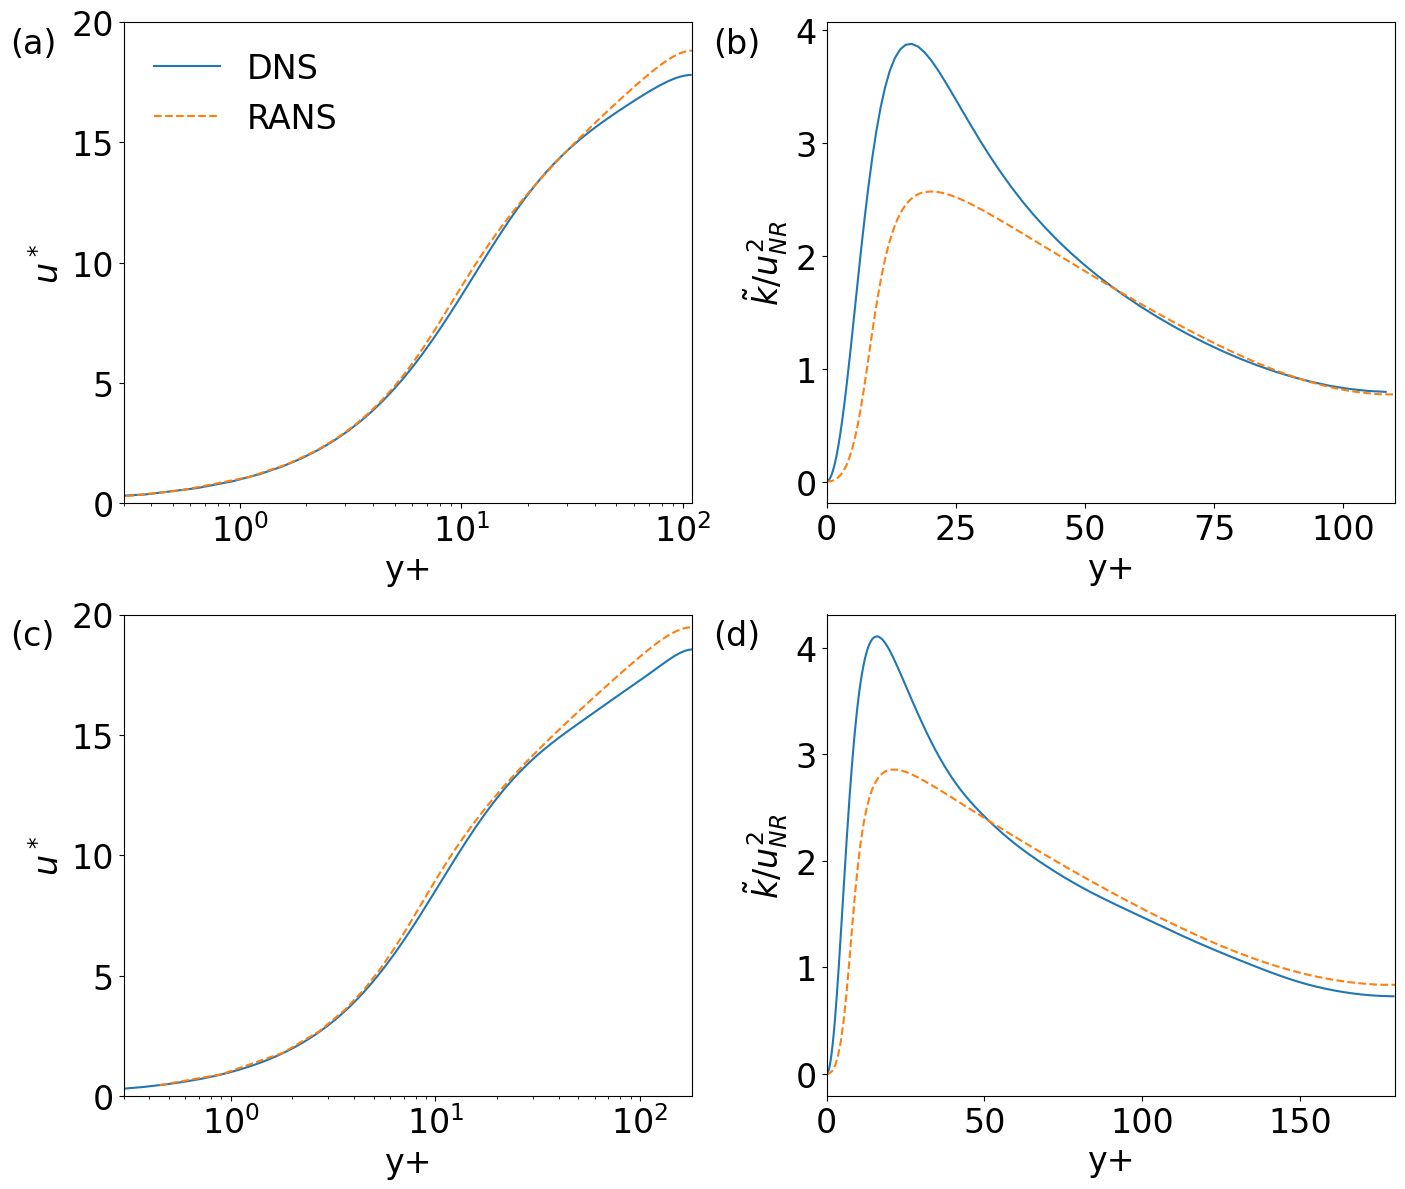

In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base folder path
folder_path = "/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Figure3"

# Define file names for Re110
csv_file_name_110 = "combined_DNS_Re110.csv"
u_mean_txt_file_name_110 = "Re110_U_mean400.txt"
k_txt_file_name_110 = "Re110_k400.txt"

# Define file names for Re180
csv_file_name_180 = "combined_DNS_Re180.csv"
u_mean_txt_file_name_180 = "Re180_U_mean400.txt"
k_txt_file_name_180 = "Re180_k400.txt"

# Construct full file paths using os.path.join for Re110
csv_file_path_110 = os.path.join(folder_path, csv_file_name_110)
u_mean_txt_file_path_110 = os.path.join(folder_path, u_mean_txt_file_name_110)
k_txt_file_path_110 = os.path.join(folder_path, k_txt_file_name_110)

# Construct full file paths using os.path.join for Re180
csv_file_path_180 = os.path.join(folder_path, csv_file_name_180)
u_mean_txt_file_path_180 = os.path.join(folder_path, u_mean_txt_file_name_180)
k_txt_file_path_180 = os.path.join(folder_path, k_txt_file_name_180)

# Load the data from the CSV and text files for Re110
csv_data_110 = pd.read_csv(csv_file_path_110)
u_mean_data_110 = pd.read_csv(u_mean_txt_file_path_110, delim_whitespace=True, header=None, names=["u_mean", "y+"])
k_data_110 = pd.read_csv(k_txt_file_path_110, delim_whitespace=True, header=None, names=["k", "y+"])

# Load the data from the CSV and text files for Re180
csv_data_180 = pd.read_csv(csv_file_path_180)
u_mean_data_180 = pd.read_csv(u_mean_txt_file_path_180, delim_whitespace=True, header=None, names=["u_mean", "y+"])
k_data_180 = pd.read_csv(k_txt_file_path_180, delim_whitespace=True, header=None, names=["k", "y+"])

# Adjust y+ for the RANS data for Re110
u_mean_data_110['y+'] = u_mean_data_110['y+'] * 110
k_data_110['y+'] = k_data_110['y+'] * 110

# Adjust y+ for the RANS data for Re180
u_mean_data_180['y+'] = u_mean_data_180['y+'] * 180
k_data_180['y+'] = k_data_180['y+'] * 180

# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Set font sizes
fontsize_title = 24
fontsize_labels = 24
fontsize_legend = 24

# Figure (a): y+ vs u_mean for Re110
axs[0, 0].plot(csv_data_110['y+'], csv_data_110['u_mean'], label='DNS')
axs[0, 0].plot(u_mean_data_110['y+'], u_mean_data_110['u_mean'], label='RANS', linestyle='--')
axs[0, 0].set_xlabel(r'y+', fontsize=fontsize_labels)
axs[0, 0].set_ylabel(r'$u^*$', fontsize=fontsize_labels)
axs[0, 0].set_xlim([0.3, 110])
axs[0, 0].set_ylim([0, 20.0])
axs[0, 0].set_xscale('log')
axs[0, 0].set_yticks([0, 5, 10, 15, 20])
axs[0, 0].legend(fontsize=fontsize_legend, frameon=False)
axs[0, 0].tick_params(axis='both', which='major', labelsize=fontsize_labels)
axs[0, 0].text(-0.2, 0.99, '(a)', transform=axs[0, 0].transAxes, fontsize=fontsize_title, verticalalignment='top')

# Figure (b): y+ vs k for Re110
axs[0, 1].plot(csv_data_110['y+'], csv_data_110['k'], label='DNS')
axs[0, 1].plot(k_data_110['y+'], k_data_110['k'], label='RANS', linestyle='--')
axs[0, 1].set_xlabel(r'y+', fontsize=fontsize_labels)
axs[0, 1].set_ylabel(r'$\tilde{k}/u_{NR}^2$', fontsize=fontsize_labels)
axs[0, 1].set_xlim([0, 110])
axs[0, 1].legend().set_visible(False)
axs[0, 1].tick_params(axis='both', which='major', labelsize=fontsize_labels)
axs[0, 1].text(-0.2, 0.99, '(b)', transform=axs[0, 1].transAxes, fontsize=fontsize_title, verticalalignment='top')

# Figure (c): y+ vs u_mean for Re180
axs[1, 0].plot(csv_data_180['y+'], csv_data_180['u_mean'], label='DNS')
axs[1, 0].plot(u_mean_data_180['y+'], u_mean_data_180['u_mean'], label='RANS', linestyle='--')
axs[1, 0].set_xlabel(r'y+', fontsize=fontsize_labels)
axs[1, 0].set_ylabel(r'$u^*$', fontsize=fontsize_labels)
axs[1, 0].set_xlim([0.3, 180])
axs[1, 0].set_ylim([0, 20.0])
axs[1, 0].set_xscale('log')
axs[1, 0].set_yticks([0, 5, 10, 15, 20])
axs[1, 0].legend().set_visible(False)
axs[1, 0].tick_params(axis='both', which='major', labelsize=fontsize_labels)
axs[1, 0].text(-0.2, 0.99, '(c)', transform=axs[1, 0].transAxes, fontsize=fontsize_title, verticalalignment='top')

# Figure (d): y+ vs k for Re180
axs[1, 1].plot(csv_data_180['y+'], csv_data_180['k'], label='DNS')
axs[1, 1].plot(k_data_180['y+'], k_data_180['k'], label='RANS', linestyle='--')
axs[1, 1].set_xlabel(r'y+', fontsize=fontsize_labels)
axs[1, 1].set_ylabel(r'$\tilde{k}/u_{NR}^2$', fontsize=fontsize_labels)
axs[1, 1].set_xlim([0, 180])
axs[1, 1].legend().set_visible(False)
axs[1, 1].tick_params(axis='both', which='major', labelsize=fontsize_labels)
axs[1, 1].text(-0.2, 0.99, '(d)', transform=axs[1, 1].transAxes, fontsize=fontsize_title, verticalalignment='top')

# Adjust layout and save the figure in multiple formats
plt.tight_layout()
output_file_path = os.path.join(folder_path, "combined_plots")
plt.savefig(f"{output_file_path}.png", format='png')
plt.savefig(f"{output_file_path}.eps", format='eps')
plt.savefig(f"{output_file_path}.pdf", format='pdf')

# Show the plot
plt.show()
